In [60]:
using DifferentialEquations

In [61]:
using Plots

In [104]:
function xdiff_core(y,xs)
#     [0.0;(y[3:end] .- y[1:end-2])  ./ (xs[3:end] - xs[1:end-2]);0.0]
    [0.0;(y[3:end] .- y[2:end-1])  ./ (xs[3:end] - xs[2:end-1]);0.0]
end

xdiff_core (generic function with 1 method)

In [105]:
function xdiff_bc(xs,bc_type="default")
    xs_bc = zero(xs)
    
    if bc_type == "default"
        xs_bc[1] = 0.0;
        xs_bc[end] = 1.0;
        return xs_bc
    end
end

xdiff_bc (generic function with 2 methods)

In [106]:
xs = range(0,1,1001)
u = zero(xs);

p = xs;

In [107]:
f(u,p,t) = xdiff_bc(p) + xdiff_core(u,p);
u0 = zero(xs)
tspan = (0.0,5.0)
prob = ODEProblem(f,u0,tspan,p);

In [108]:
sol = solve(prob,alg=RK4(),saveat=0:1e-2:5);

In [109]:
sol.u;

┌ Info: Saved animation to 
│   fn = /Users/yuxuanli/Documents/GitHub/ComputationalHeatTransfer.jl/notebooks/tmp.gif
└ @ Plots /Users/yuxuanli/.julia/packages/Plots/nbICw/src/animation.jl:139


Plots.AnimatedGif("/Users/yuxuanli/Documents/GitHub/ComputationalHeatTransfer.jl/notebooks/tmp.gif")
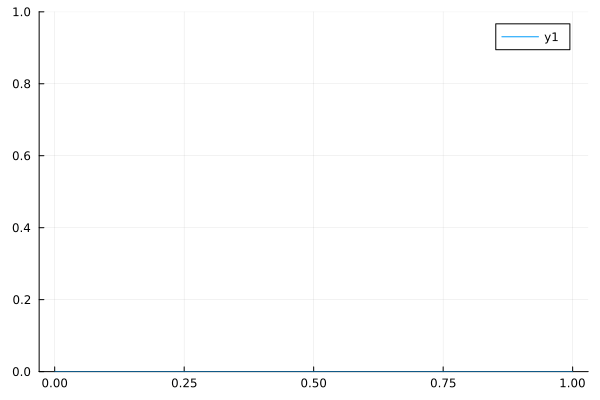

In [103]:
@gif for ui in sol.u 
    plot(xs,ui,ylim=(0,1))
end

In [5]:
A = 1;
B = 2;
C = 3;

In [12]:
xdiff_core(sin.(xs),xs);

In [13]:
xdiff_bc(xs);

In [15]:
xdiff = xdiff_bc(xs) + xdiff_core(sin.(xs),xs);

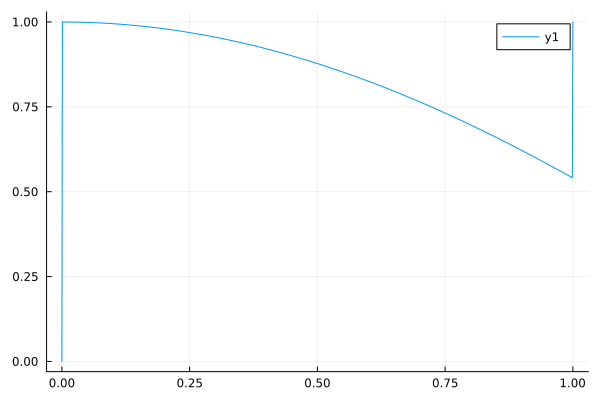

In [18]:
plot(xs,xdiff)